# Laboratorium 2


### Konfiguracja

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
import json as js

class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes

    def set_axis(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(self.scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(self.scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in self.scenes[self.i].points:
            if len(collection.points) > 0:
                self.ax.scatter(*zip(*(np.array(collection.points))), **collection.kwargs)
        for collection in self.scenes[self.i].lines:
            self.ax.add_collection(collection.get_collection())
        self.ax.autoscale()
        plt.draw()

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [116]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], **kwargs):
        self.points = np.array(points)
        self.kwargs = kwargs

class LinesCollection:
    def __init__(self, lines = [], **kwargs):
        self.lines = lines
        self.kwargs = kwargs
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        return mcoll.LineCollection(self.lines, **self.kwargs)
            


class Plot:
    def __init__(self, scenes = [], json = None):
        if json is None:
            self.scenes = scenes
        else:
            self.scenes = [Scene([PointsCollection(pointsCol) for pointsCol in scene["points"]], 
                                 [LinesCollection(linesCol) for linesCol in scene["lines"]]) 
                           for scene in js.loads(json)]
        
    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        axprev = plt.axes([0.6, 0.05, 0.15, 0.075])
        axnext = plt.axes([0.76, 0.05, 0.15, 0.075])
        bnext = Button(axnext, 'Następny')
        bnext.on_clicked(callback.next)
        bprev = Button(axprev, 'Poprzedni')
        bprev.on_clicked(callback.prev)
        return [bprev, bnext]

    def draw(self):
        plt.close()
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        callback.set_axis(plt.axes())
        plt.show()
        callback.draw()
        
    def toJSON(self):
        return js.dumps([{"points": [pointCol.points.tolist() for pointCol in scene.points], 
                          "lines":[linesCol.lines for linesCol in scene.lines]} 
                         for scene in self.scenes])

### Przykład użycia

<IPython.core.display.Javascript object>


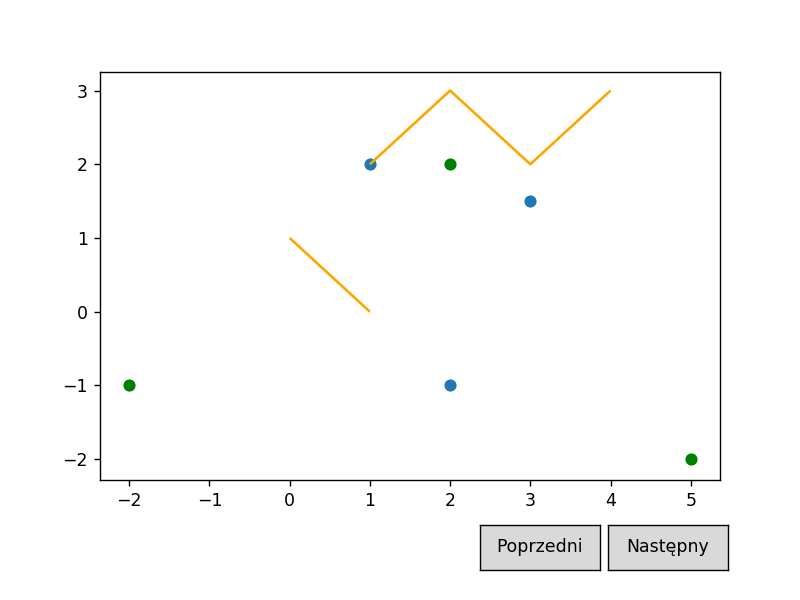

In [117]:
%matplotlib notebook

scenes=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
               PointsCollection([(5, -2), (2, 2), (-2, -1)], color='green')], 
              [LinesCollection([[(1,2),(2,3),(3,2), (4,3)], [(0,1),(1,0)]], color='orange')]), 
        Scene([PointsCollection([(1, 2), (-15, 1.5), (2, -1)], color='red'), 
               PointsCollection([(5, -2), (2, 2), (-2, 1)], color='black')], 
              [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

plot = Plot(scenes)
plot.draw() 


### Rozwiązanie

#### Generowanie zbiorów

In [118]:
#generator punktów leżących na prostokącie

def getRectangle(pointsQuantity, vertices):
    # przyjmuję wierzchołki w takiej kolejności jak w pierwotnym 
    # przykładzie i zakładam że boki prostokąta są równoległe do osi
    rectangle = []
    points = [np.random.randint(0,4) for x in range(pointsQuantity)]
    for x in points:
        if x == 0:
            y = np.random.uniform(vertices[1][1],vertices[0][1])
            rectangle.append((vertices[0][0],y))
        if x == 1:
            x = np.random.uniform(vertices[1][0],vertices[2][0])
            rectangle.append((x,vertices[1][1]))
        if x == 2:
            y = np.random.uniform(vertices[2][1],vertices[3][1])
            rectangle.append((vertices[2][0],y))
        if x == 3:
            x = np.random.uniform(vertices[0][0],vertices[3][0])
            rectangle.append((x,vertices[0][1]))
    return rectangle

In [119]:
#generator punktów leżących na kwadracie i jego przekątnych
def getCrossSquare(pSides, pCross, vertices):
    #zakładam że wierzchołki kwadratu są przekazane w taki sposób 
    # jak przykładzie z zadania 1
    square = []
    square +=[(vertices[0][0],np.random.uniform(vertices[0][1],vertices[3][1])) for x in range(pSides)]
    square += [(np.random.uniform(vertices[0][0],vertices[1][0]),vertices[0][1]) for x in range(pSides)]
    square += [(vertices[0][0]+x,vertices[0][1]+x) for x in np.random.uniform(0,vertices[2][0]-vertices[0][0],pCross)]
    square += [(vertices[3][0]+x,vertices[3][1]-x) for x in np.random.uniform(0,vertices[1][0]-vertices[3][0],pCross)]
    return square

In [120]:
#denerator punktów losowych z podanego zakresu
def getRandomPoints(pointsQuantity, leftBorder, rightBorder):
    randPoints = [(np.random.uniform(leftBorder,rightBorder)
                   ,np.random.uniform(leftBorder,rightBorder)) 
                  for x in range(pointsQuantity)]
    return randPoints


In [121]:
# generator punktów na kole
def getCirclePoints(pointsQuantity, circleCenter, radius):
    pointsCircle = [(radius*np.sin((np.pi/2)*x)+circleCenter[0],
                     radius*np.cos((np.pi/2)*x)+circleCenter[1])
                    for x in np.random.uniform(0,4,pointsQuantity)]
    return pointsCircle


<IPython.core.display.Javascript object>


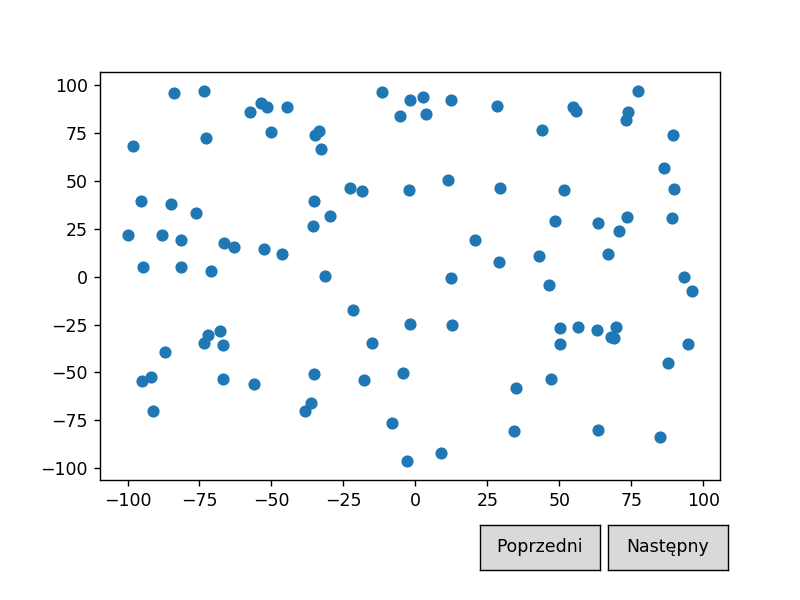

In [144]:
%matplotlib notebook
# zbiory punktów zadeklarowane w instrukcji do zadania

#punkty losowe
randPoints = [(np.random.uniform(-100,100),np.random.uniform(-100,100)) for x in range(100)]
#punkty na kole
pointsCircle = getCirclePoints(100,(0,0),10)
#punkty na prostokącie
rectangle = getRectangle(100,[(-10,10),(-10,-10),(10,-10),(10,10)])
#punkty na kwadracie wraz z przekątnymi
crossSquare = getCrossSquare(25,20,[(0,0),(10,0),(10,10),(0,10)])

scenes = [Scene([PointsCollection(randPoints)]),
          Scene([PointsCollection(pointsCircle)]),
          Scene([PointsCollection(rectangle)]),
          Scene([PointsCollection(crossSquare)])]
plot1 = Plot(scenes)
plot1.draw()

<IPython.core.display.Javascript object>


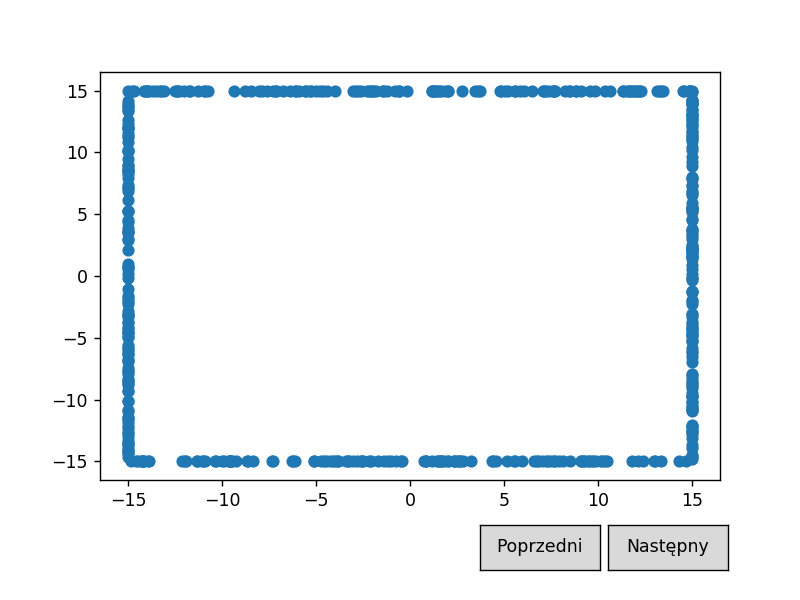

In [238]:
%matplotlib notebook
# dodatkowe zbiory

#punkty losowe
randPoints1 = getRandomPoints(400,0,150)
#punkty na kole
pointsCircle1 = getCirclePoints(200,(80,-10),10)
#punkty na prostokącie
rectangle1 = getRectangle(500,[(-15,15),(-15,-15),(15,-15),(15,15)])
#punkty na kwadracie wraz z przekątnymi
crossSquare1 = getCrossSquare(100,100,[(0,0),(20,0),(20,20),(0,20)])

scenes = [Scene([PointsCollection(randPoints1)]),
          Scene([PointsCollection(pointsCircle1)]),
          Scene([PointsCollection(rectangle1)]),
          Scene([PointsCollection(crossSquare1)])]
plot1 = Plot(scenes)
plot1.draw()

#### Funkcje pomocnicze

In [223]:
def determiner1(a,b,c):
    return a[0]*b[1] + a[1]*c[0] + b[0]*c[1] - a[0]*c[1] - a[1]*b[0] - b[1]*c[0]

In [224]:
def squaredDist(a,b):
    return (a[0]-b[0])**2 + (a[1]-b[1])**2

def bottomLeft(points):
    minPoint = points[0]
    minPointId = 0
    for i in range (len(points)):
        if(points[i][1] < minPoint[1]):
            minPoint = points[i]
            minPointId = i
        elif(points[i][1] == minPoint[1] and points[i][0] > minPoint[0]):
            minPoint = points[i]
            minPointId = i
    return minPoint,minPointId

In [225]:
def orientation(b,c,det,a,eps):
    detResult = det(a,b,c)
    if(np.abs(detResult) <= eps):
        if(squaredDist(a,b) < squaredDist(a,c)):
            return 1
        else:
            return -1
    else:
        if(detResult > eps):
            return 1
        else:
            return -1

#### Zapis do pliku 

In [226]:
#funckja zapisująca otoczkę do pliku
import pickle

def convexHullToPickle(hull, fileName):
    f = open(fileName+".pickle", "wb+")
    pickle.dump(hull, f)

def convexHullToFile(hull, fileName):
    f = open(fileName+'.txt',"w+")
    f.write(np.array_str(hull.points))
    f.close()

#### Algorytm Grahama

In [227]:
import functools

def pushToConvexHull(convexHull, point, eps):
    detResult = determiner1(convexHull[-2], convexHull[-1], point)
    
    while(detResult < -eps):
            convexHull.pop()
            detResult = determiner1(convexHull[-2], convexHull[-1], point)
    
    if(abs(detResult)<= eps):
        convexHull.pop()
        convexHull.append(point)
    elif(detResult > 0):
        convexHull.append(point)
    

def Graham(points,epsilon):
    
    minimalpoint,_ = bottomLeft(points)
    
    compare = functools.partial(orientation,det=determiner1, a=minimalpoint, eps=epsilon)
    sortedPoints = sorted(points, key=functools.cmp_to_key(compare), reverse = True)
    convexHull = [sortedPoints[0],sortedPoints[1]]
    
    for point in sortedPoints[2:]:
        pushToConvexHull(convexHull,point,epsilon)
    
    return convexHull
    
    

#### Algorytm Jarvisa

In [228]:
def Jarvis(points, eps):
    _, minIndex = bottomLeft(points)
    lastPoint = minIndex
    convexHull = []
    
    while(True):
        convexHull.append(points[lastPoint])
        nextPoint = (lastPoint+1)%len(points)
        
        for i in range(len(points)):
            if i != lastPoint and i != nextPoint:
                detResult = determiner1(points[lastPoint], points[nextPoint],points[i])
                
                if detResult < -eps :
                    nextPoint = i
                elif abs(detResult) <= eps:
                    if squaredDist(points[lastPoint],points[nextPoint]) < squaredDist(points[lastPoint],points[i]):
                        nextPoint = i
                        
        lastPoint = nextPoint
        
        if lastPoint == minIndex:
            break
            
    return convexHull
        


#### Sprawdzenie czasu wykonania algorytmów oraz wyznaczonych otoczek dla zbiorów punktów z punktu pierwszego

In [240]:
import time
def visualizeConvexHull(points, hull):
    lines  = []
    for x in enumerate(hull):
        lines.append([x[1],hull[(x[0]+1)%len(hull)]])
    return Scene([PointsCollection(points, color='violet'),PointsCollection(hull)]
                ,[LinesCollection(lines)])

def algorithmData(algorithm, pointSets, eps = 1e-12, writeToFile=False ):
    scenes = []
    for x in pointSets.keys():
        begin = time.time()
        convexHull = algorithm(pointSets[x],eps)
        end = time.time()
        
        scenes.append(visualizeConvexHull(pointSets[x], convexHull))
        
        if (writeToFile):
            convexHullToFile(hull, setName)
            convexHullToPickle(hull, setName)
        
        
        
        print('Algorithm: %s   Set: %s   time: %f s points on convex hull :  %d' % (algorithm.__name__,x, end - begin, len(convexHull)))
       
    return scenes

sets = {'randPoints':randPoints1,'rectangle':rectangle1, 'circle':pointsCircle1, 'square':crossSquare1}

#### tests for Graham

Algorithm: Graham   Set: randPoints   time: 0.011964 s points on convex hull :  18
Algorithm: Graham   Set: rectangle   time: 0.010969 s points on convex hull :  8
Algorithm: Graham   Set: circle   time: 0.006943 s points on convex hull :  200
Algorithm: Graham   Set: square   time: 0.011010 s points on convex hull :  7


<IPython.core.display.Javascript object>


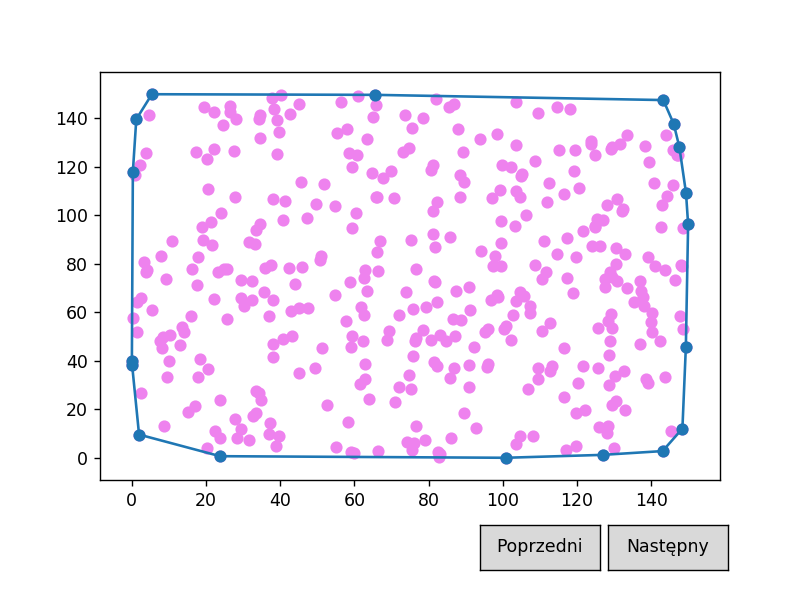

In [243]:

%matplotlib notebook


scenes = algorithmData(Graham,sets)
plot = Plot(scenes)
plot.draw()

#### tests for Jarvis

Algorithm: Jarvis   Set: randPoints   time: 0.010974 s points on convex hull :  18
Algorithm: Jarvis   Set: rectangle   time: 0.007940 s points on convex hull :  8
Algorithm: Jarvis   Set: circle   time: 0.083808 s points on convex hull :  200
Algorithm: Jarvis   Set: square   time: 0.005949 s points on convex hull :  7


<IPython.core.display.Javascript object>


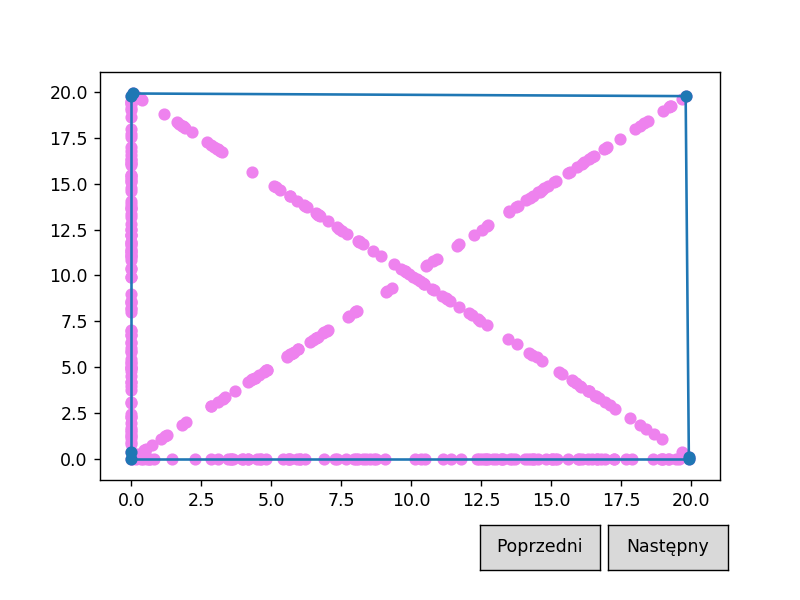

In [244]:
%matplotlib notebook

scenes = algorithmData(Jarvis,sets)
plot = Plot(scenes)
plot.draw()

In [264]:
import copy


def pushToConvexHullVisualize(convexHull, point, points, eps, pointsCol, linesCol,consideredPoints,scenes):
    detResult = determiner1(convexHull[-2], convexHull[-1], point)
    consideredPoints.append(point)
    while(detResult < -eps):
        scenes.append(Scene([PointsCollection(points, color='violet'),PointsCollection(copy.deepcopy(pointsCol)),
                            PointsCollection(copy.deepcopy(consideredPoints),color='red')]
                ,[LinesCollection(copy.deepcopy(linesCol))]))        
        convexHull.pop()
        pointsCol.pop()
        linesCol.pop()
        detResult = determiner1(convexHull[-2], convexHull[-1], point)
    if(abs(detResult)<= eps):
        convexHull.pop()
        pointsCol.pop()
        linesCol.pop()
        scenes.append(Scene([PointsCollection(points, color = 'violet'),PointsCollection(copy.deepcopy(pointsCol)),
                            PointsCollection(copy.deepcopy(consideredPoints),color = 'red')]
                ,[LinesCollection(copy.deepcopy(linesCol))]))
        convexHull.append(point)
        pointsCol.append(point)
        linesCol.append([pointsCol[-2],pointsCol[-1]])
        scenes.append(Scene([PointsCollection(points, color = 'violet'),PointsCollection(copy.deepcopy(pointsCol)),
                            PointsCollection(copy.deepcopy(consideredPoints),color = 'red')]
                ,[LinesCollection(copy.deepcopy(linesCol))]))
    elif(detResult > 0):
        scenes.append(Scene([PointsCollection(points, color ='violet'),PointsCollection(copy.deepcopy(pointsCol)),
                            PointsCollection(copy.deepcopy(consideredPoints),color='red')]
                ,[LinesCollection(copy.deepcopy(linesCol))]))
        convexHull.append(point)
        pointsCol.append(point)
        linesCol.append([pointsCol[-2],pointsCol[-1]])
        scenes.append(Scene([PointsCollection(points, color = 'violet'),PointsCollection(copy.deepcopy(pointsCol))]
                ,[LinesCollection(copy.deepcopy(linesCol))]))
    consideredPoints.pop()
    

def GrahamVisualize(points,epsilon):
    minimalpoint,_ = bottomLeft(points)

    compare = functools.partial(orientation,det=determiner1, a=minimalpoint, eps=epsilon)
    sortedPoints = sorted(points, key=functools.cmp_to_key(compare), reverse = True)
    
    convexHull = [minimalpoint,sortedPoints[1]]
    pointsCol = [minimalpoint,sortedPoints[1]]
    consideredPoints = []
    linesCol = [[minimalpoint,sortedPoints[1]]]
    
    scenes = [Scene([PointsCollection(points, color = 'violet'),PointsCollection(copy.deepcopy(pointsCol))]
                ,[LinesCollection(copy.deepcopy(linesCol))])]
    
    for point in sortedPoints[2:]:
        pushToConvexHullVisualize(convexHull,point,points,epsilon,pointsCol,linesCol,consideredPoints,scenes)
        
    linesCol.append([pointsCol[0],pointsCol[-1]])
    scenes.append(Scene([PointsCollection(points, color = 'violet'),PointsCollection(pointsCol.copy())]
                ,[LinesCollection(linesCol.copy())]))
    
    return scenes

    

<IPython.core.display.Javascript object>


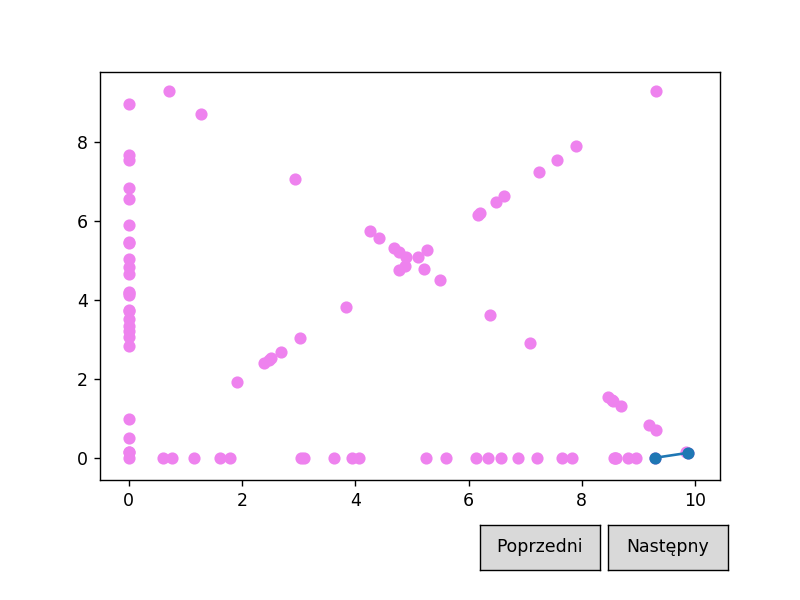

In [269]:
squarePoints = getCrossSquare(25,20,[(0,0),(10,0),(10,10),(0,10)])
scenes = GrahamVisualize(squarePoints,10**-10)
plot = Plot(scenes)
plot.draw()

<IPython.core.display.Javascript object>


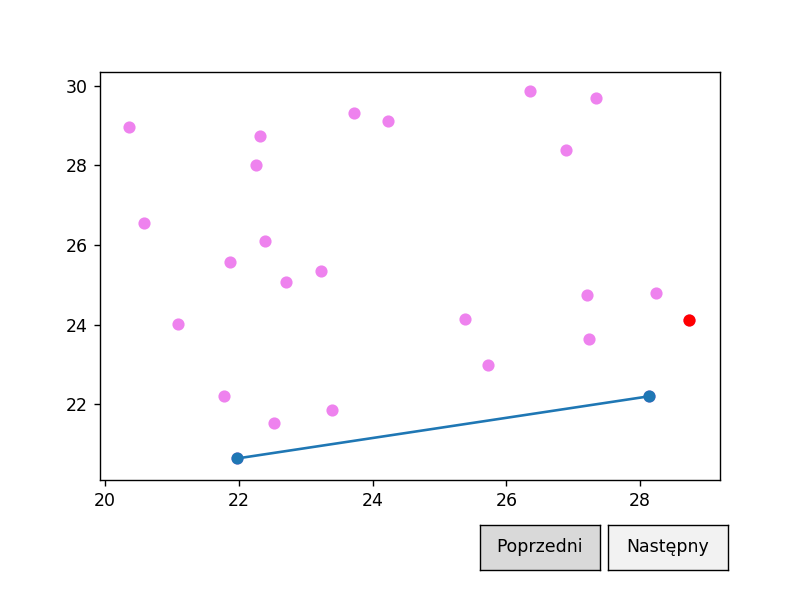

In [270]:
rand = getRandomPoints(25,20,30)
scenes = GrahamVisualize(rand,10**-10)
plot = Plot(scenes)
plot.draw()

In [273]:
def JarvisVisualize(points, eps):
    _, minIndex = bottomLeft(points)
    lastPoint = minIndex
    convexHull = []
    
    pointsCol = [points[lastPoint]]
    consideredPoints = []
    consideredLine = []
    linesCol = []
    scenes = [Scene([PointsCollection(points, color='violet'),PointsCollection(copy.deepcopy(pointsCol))],
                    [LinesCollection(copy.deepcopy(linesCol))])]
                
    
    while(True):
        convexHull.append(points[lastPoint])
        nextPoint = (lastPoint+1)%len(points)
        
        for i in range(len(points)):
            if i != lastPoint and i != nextPoint:
                consideredPoints.append(points[i])
                consideredLine.append([pointsCol[-1],points[i]])
                scenes.append(Scene([PointsCollection(points, color = 'violet'),PointsCollection(copy.deepcopy(pointsCol)),
                PointsCollection(copy.deepcopy(consideredPoints), color = 'red')]
               ,[LinesCollection(copy.deepcopy(linesCol)),LinesCollection(copy.deepcopy(consideredLine),color = 'red')]))
                consideredPoints.pop()
                consideredLine.pop()
                detResult = determiner1(points[lastPoint], points[nextPoint],points[i])
                if detResult < -eps :
                    nextPoint = i
                elif abs(detResult) <= eps:
                    if squaredDist(points[lastPoint],points[nextPoint]) < squaredDist(points[lastPoint],points[i]):
                        nextPoint = i
        lastPoint = nextPoint
        pointsCol.append(points[lastPoint])
        linesCol.append([pointsCol[-2],pointsCol[-1]])
        scenes.append(Scene([PointsCollection(points, color =  'violet'),PointsCollection(copy.deepcopy(pointsCol))]
               ,[LinesCollection(copy.deepcopy(linesCol))]))
        if lastPoint == minIndex:
            break
    return scenes

<IPython.core.display.Javascript object>


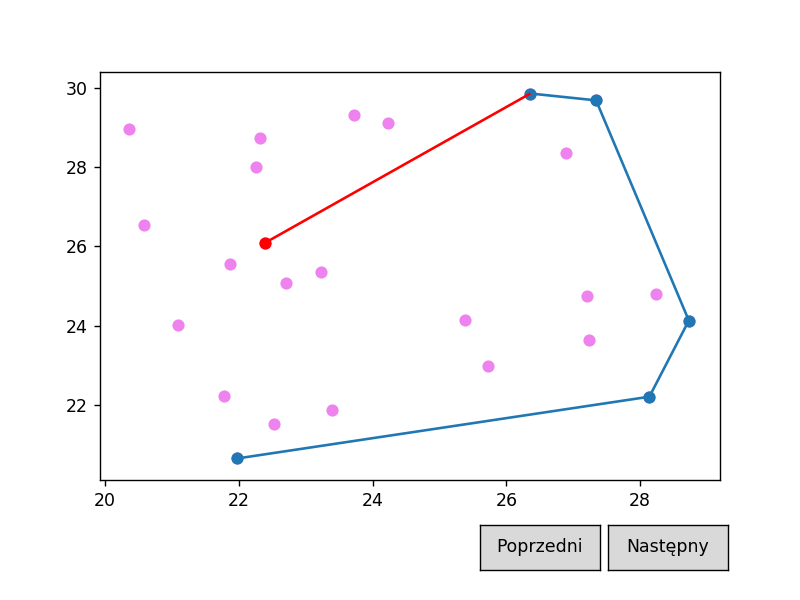

In [274]:

scenes = JarvisVisualize(rand,10**-10)
plot = Plot(scenes)

plot.draw()

<IPython.core.display.Javascript object>


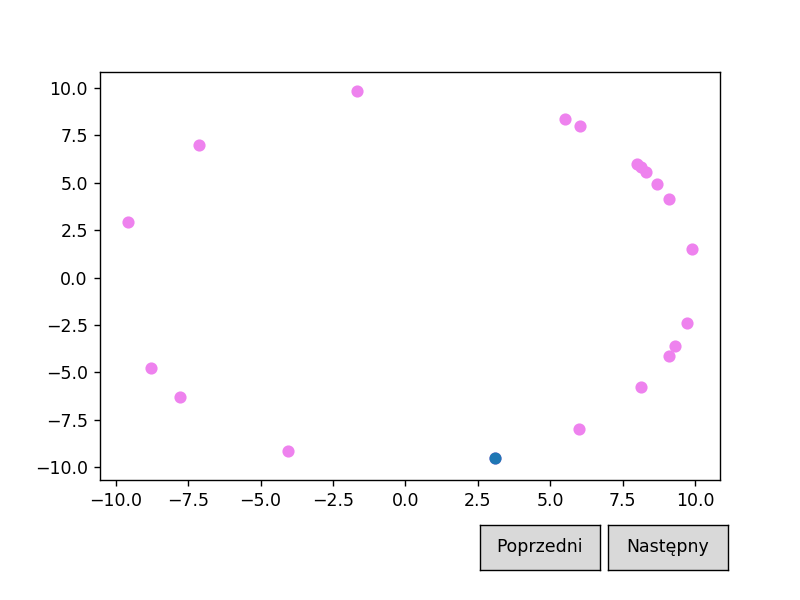

In [26]:
scenes = JarvisVisualize(pointsCircle,10**-10)
plot = Plot(scenes)

plot.draw()

<IPython.core.display.Javascript object>


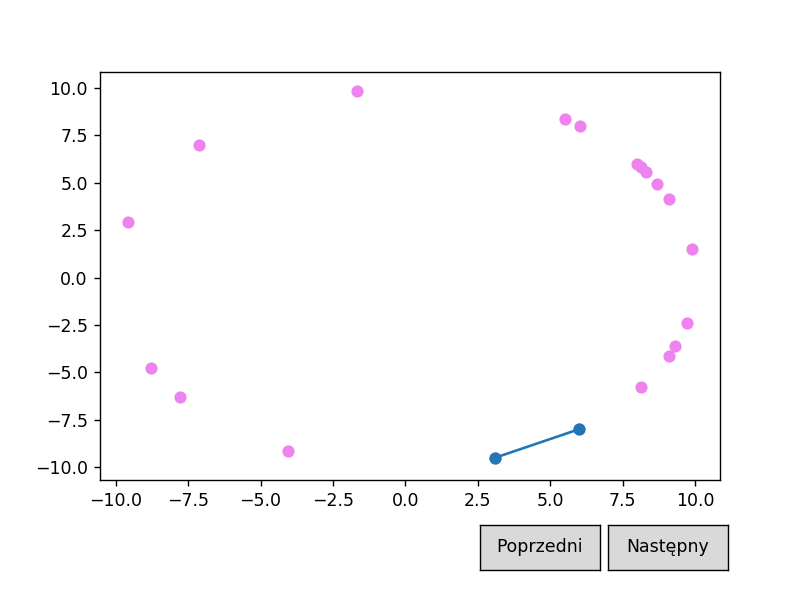

In [27]:
scenes,_ = GrahamVisualize(pointsCircle,10**-10)
plot = Plot(scenes)

plot.draw()

<IPython.core.display.Javascript object>


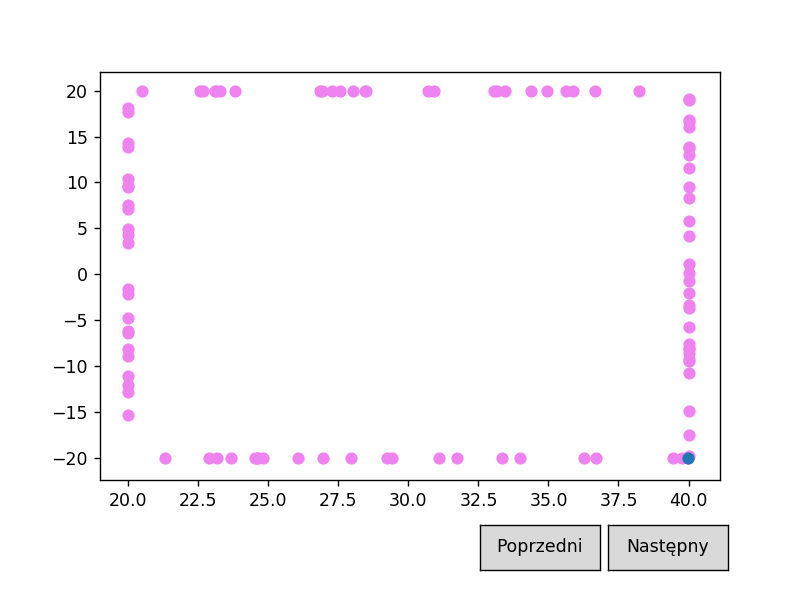

In [28]:
scenes = JarvisVisualize(square,10**-10)
plot = Plot(scenes)

plot.draw()

<IPython.core.display.Javascript object>


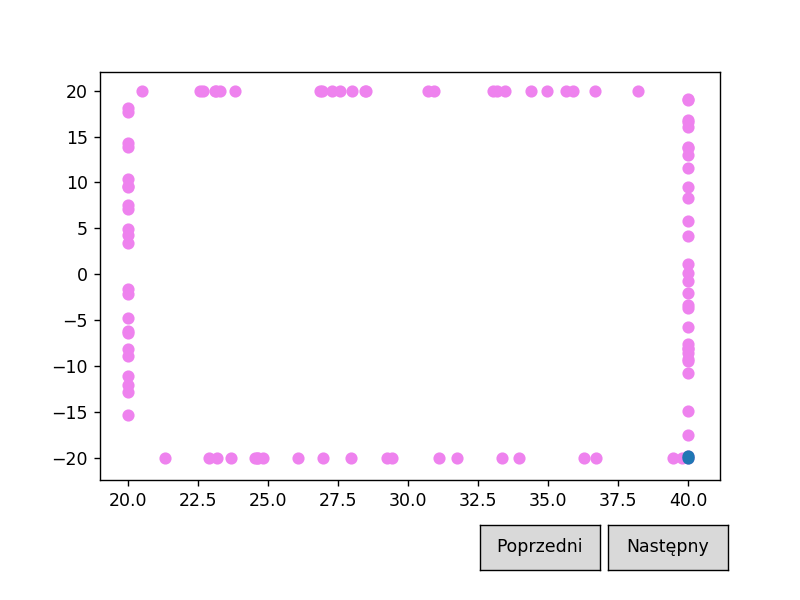

In [29]:
scenes,_ = GrahamVisualize(square,10**-10)
plot = Plot(scenes)

plot.draw()